In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR


C:\Users\Vaibhav Khurana\AppData\Local\Temp\ipykernel_9652\1567603540.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load dataset
data = pd.read_csv('housing.csv')

# EDA - Exploratory Data Analysis
data.dropna(inplace=True)  # Handling missing values

# Feature Engineering
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Converting 'ocean_proximity' to dummy variables
data = pd.get_dummies(data, columns=['ocean_proximity'])

# Splitting dataset
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Model Training
def train_model(model, parameters, X_train, y_train, X_test, y_test, use_scaling=False):
    if use_scaling:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return best_model, mse, r2

# Models and parameters
models_params = {
    'LinearRegression': (LinearRegression(), {}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}),
    'SVR': (SVR(), {'C': [1, 10], 'kernel': ['linear', 'rbf']})
}

results = {}

for name, (model, params) in models_params.items():
    best_model, mse, r2 = train_model(model, params, X_train, y_train, X_test, y_test, use_scaling=(name != 'LinearRegression'))
    results[name] = {'MSE': mse, 'R2': r2}

c:\Users\Vaibhav Khurana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vaibhav Khurana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vaibhav Khurana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Vaibhav Khurana\AppData\Local\Programs\Python\Pyt

C:\Users\Vaibhav Khurana\AppData\Local\Temp\ipykernel_9652\152258759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='R2', palette='viridis')


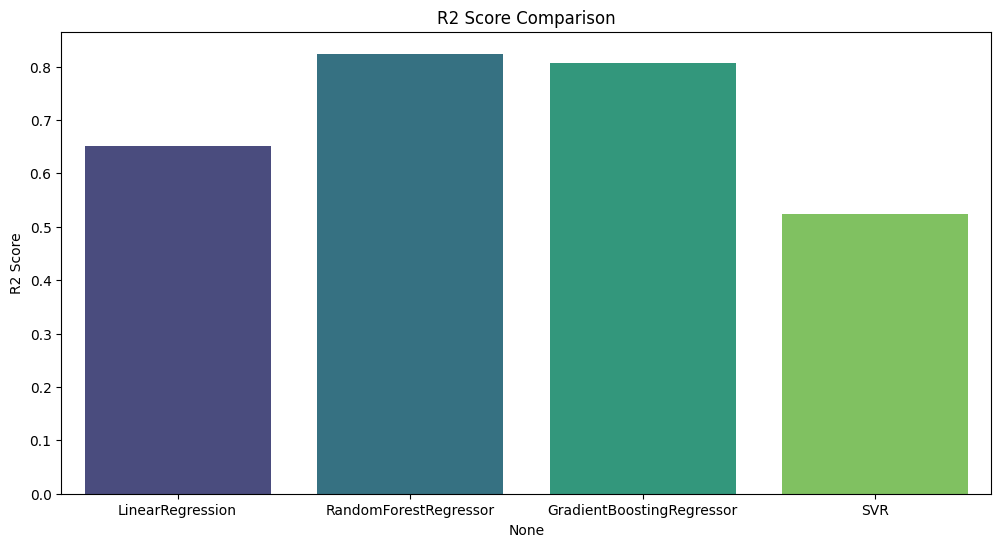

C:\Users\Vaibhav Khurana\AppData\Local\Temp\ipykernel_9652\152258759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y='MSE', palette='viridis')


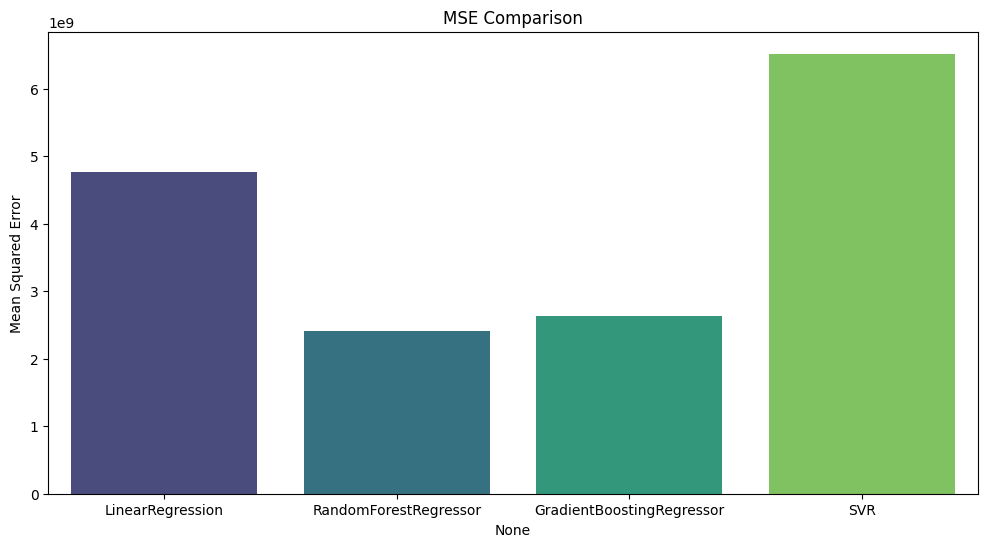

In [4]:
# Visualization of model performance
results_df = pd.DataFrame(results).T
plt.figure(figsize=(12, 6))

# R2 scores
sns.barplot(data=results_df, x=results_df.index, y='R2', palette='viridis')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()

# MSE
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x=results_df.index, y='MSE', palette='viridis')
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

In [9]:
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor

# Define the best model and its hyperparameters (example)
best_model_params = {'n_estimators': 100, 'max_features': 'sqrt'}
best_model = RandomForestRegressor(**best_model_params)

# Create a pipeline with the scaler and the best model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(max_features='sqrt'))])

In [10]:
# Serialize the pipeline
joblib.dump(pipeline, 'best_model_pipeline.pkl')

print("The model pipeline has been successfully saved as 'best_model_pipeline.pkl'")



The model pipeline has been successfully saved as 'best_model_pipeline.pkl'


In [13]:
# Load the pipeline
loaded_pipeline = joblib.load('best_model_pipeline.pkl')

# Assuming new_data is your new dataset for prediction
# predictions = loaded_pipeline.predict(new_data)

